In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the datasets
file_paths = {
    "bank_additional": "C:/Users/AMPOFO/OneDrive/Desktop/data/bank-additional.xlsx",
    "bank_additional_full": "C:/Users/AMPOFO/OneDrive/Desktop/data/bank-additional-full.xlsx",
    "bank_full": "C:/Users/AMPOFO/OneDrive/Desktop/data/bank-full.xlsx",
    "bank": "C:/Users/AMPOFO/OneDrive/Desktop/data/bank.xlsx"
}

In [3]:
# Reading the datasets into pandas dataframes
bank_additional = pd.read_excel(file_paths["bank_additional"])

In [4]:
# Reading the datasets into pandas dataframes
bank_additional_full = pd.read_excel(file_paths["bank_additional_full"])

In [5]:
# Reading the datasets into pandas dataframes
bank_full = pd.read_excel(file_paths["bank_full"])

In [6]:
# Reading the datasets into pandas dataframes
bank = pd.read_excel(file_paths["bank"])

In [7]:
# Displaying the first few rows and basic info for each dataset to understand their structure
datasets_info = {
    "bank_additional": bank_additional.info(),
    "bank_additional_full": bank_additional_full.info(),
    "bank_full": bank_full.info(),
    "bank": bank.info()
}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [8]:
bank_additional.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [9]:
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
datasets_info

{'bank_additional': None,
 'bank_additional_full': None,
 'bank_full': None,
 'bank': None}

In [12]:
# Using the bank_additional_full dataset for EDA
data = bank_additional_full.copy()

In [13]:
# Checking for missing values
missing_values = data.isnull().sum()

In [14]:
# Basic statistics
basic_stats = data.describe(include="all")

In [22]:
# Basic statistics
basic_stats = data.describe(include="all")

missing_values, basic_stats

(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64,
                 age     job  marital          education default housing  \
 count   41188.00000   41188    41188              41188   41188   41188   
 unique          NaN      12        4                  8       3       3   
 top             NaN  admin.  married  university.degree      no     yes   
 freq            NaN   10422    24928              12168   32588   21576   
 mean       40.02406     NaN      NaN                NaN     NaN     NaN   
 std        10.42125     NaN      NaN                NaN     NaN     NaN   
 min        

In [35]:
# 1. Overview of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (41188, 21)


In [36]:
print("\nDataset sample:\n", data.head())


Dataset sample:
    age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euri

In [37]:
print("\nData types:\n", data.dtypes)


Data types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [40]:
# 2 Summary statistics
print("\nSummary statistics (numerical features):\n", data.describe())


Summary statistics (numerical features):
                age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        

In [39]:
print("\nSummary statistics (categorical features):\n", data.describe(include=['object']))


Summary statistics (categorical features):
            job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548  


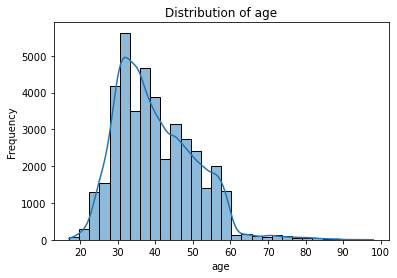

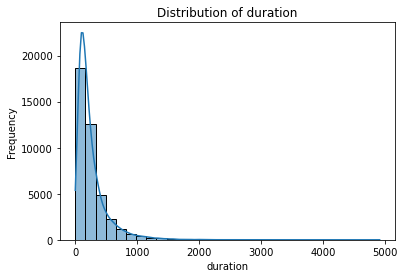

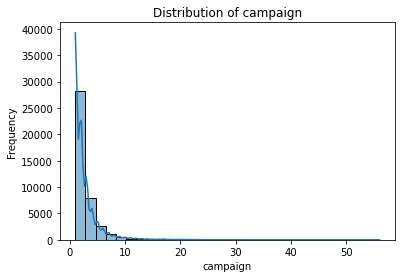

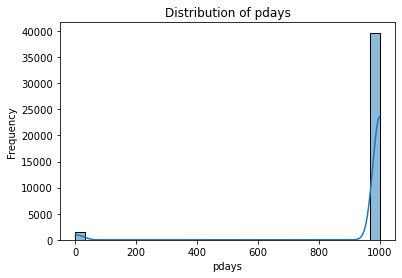

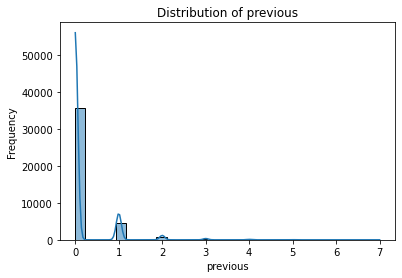

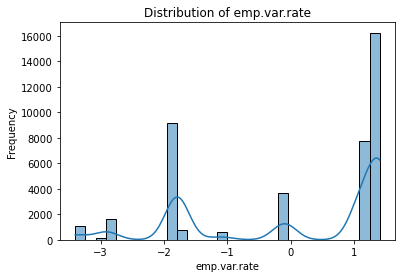

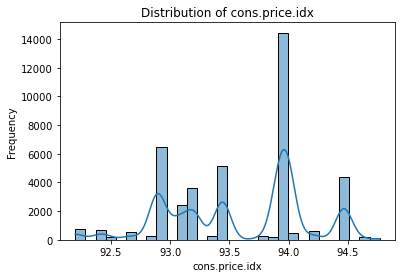

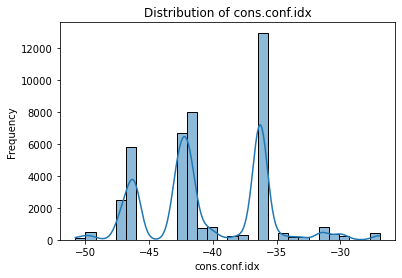

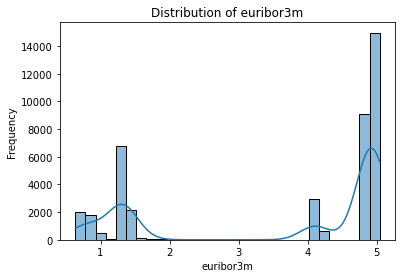

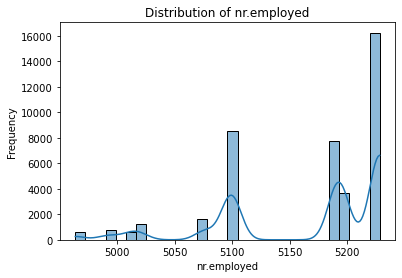

In [42]:
# 3 Distribution of key numerical features
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


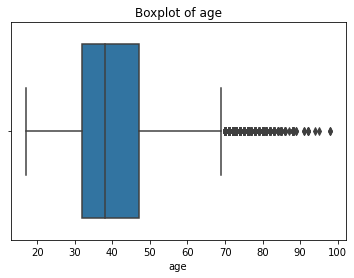

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


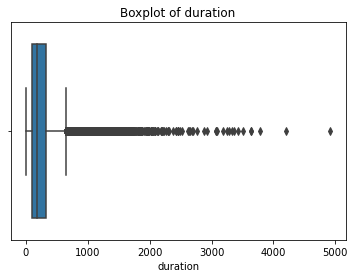

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


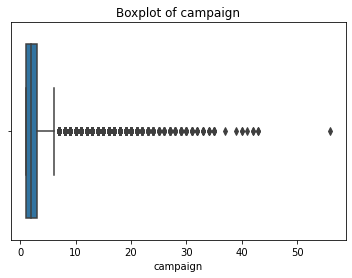

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


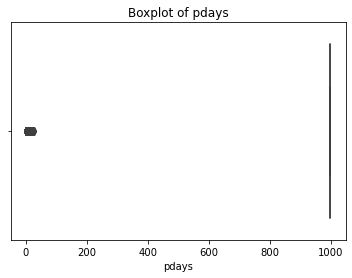

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


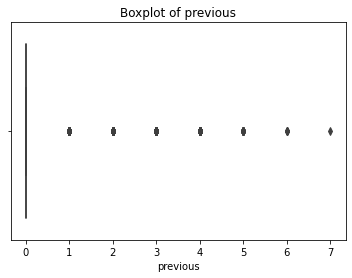

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


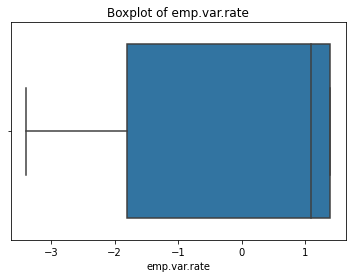

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


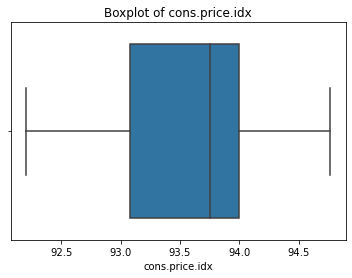

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


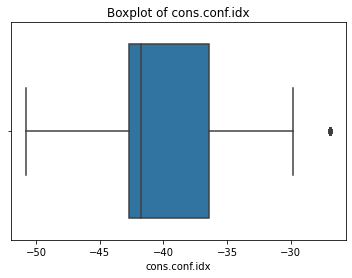

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


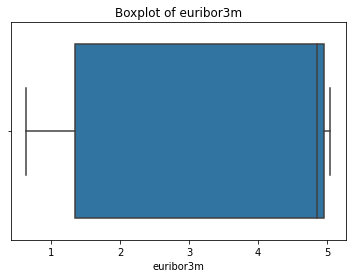

C:\Users\AMPOFO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


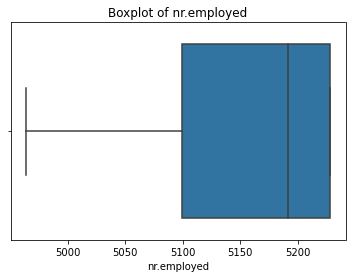

In [43]:
# 4 Boxplot to identify outliers
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

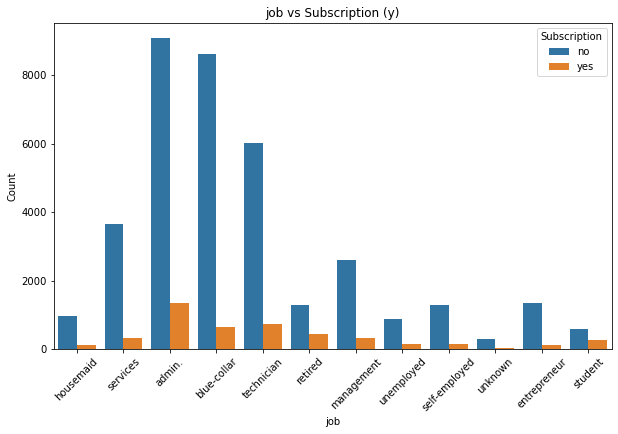

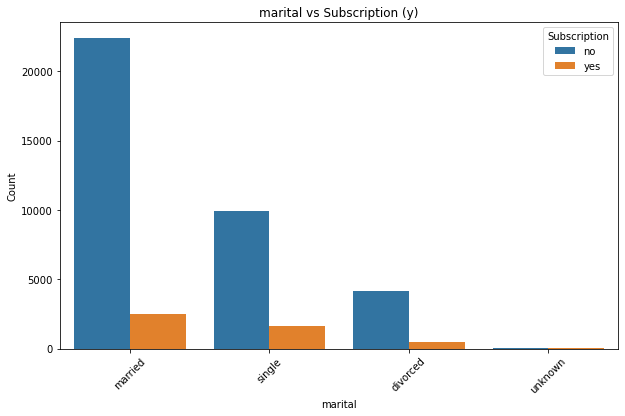

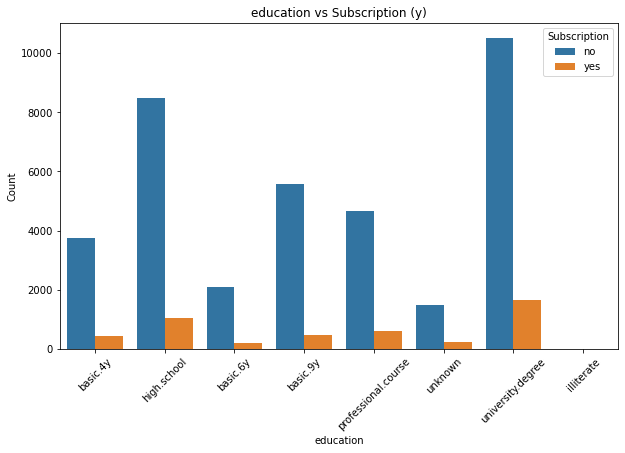

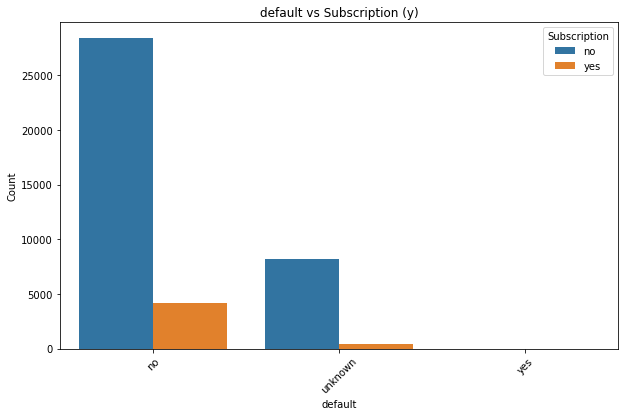

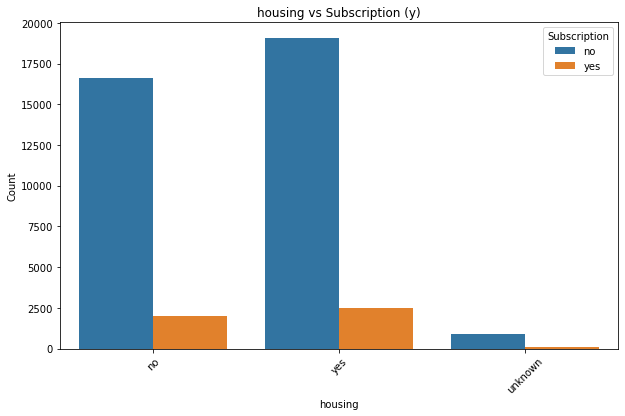

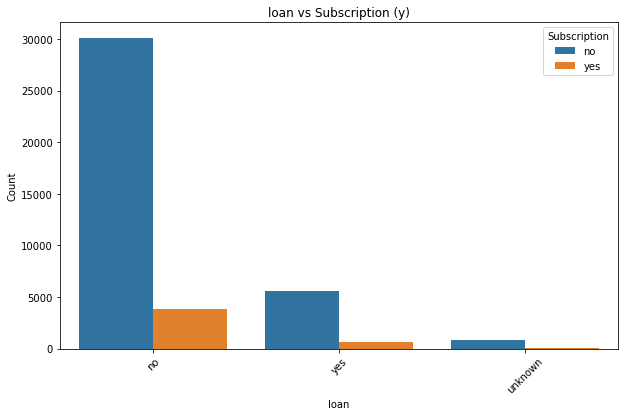

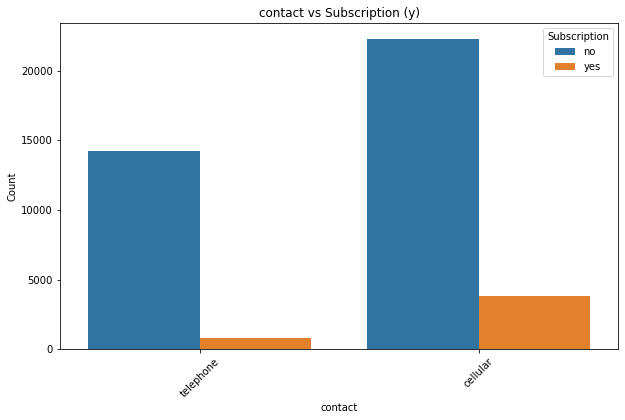

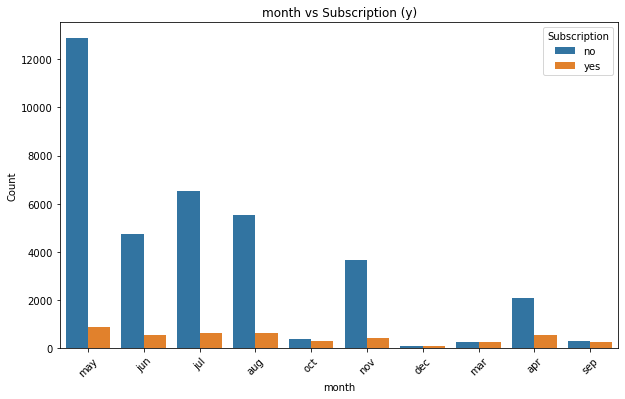

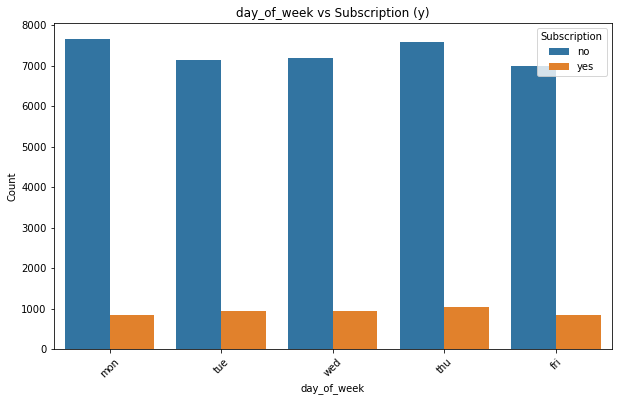

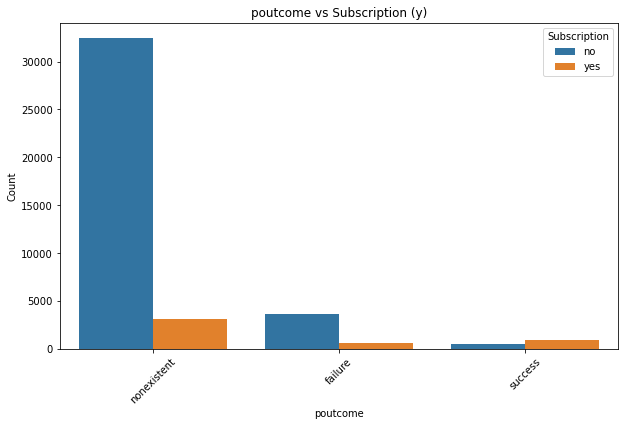

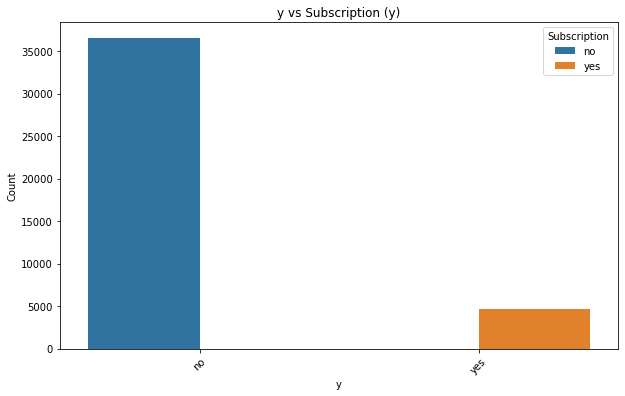

In [44]:
# 5 Relationship between key features and target
categorical_features = data.select_dtypes(include=['object']).columns

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='y', data=data)
    plt.title(f'{col} vs Subscription (y)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Subscription', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

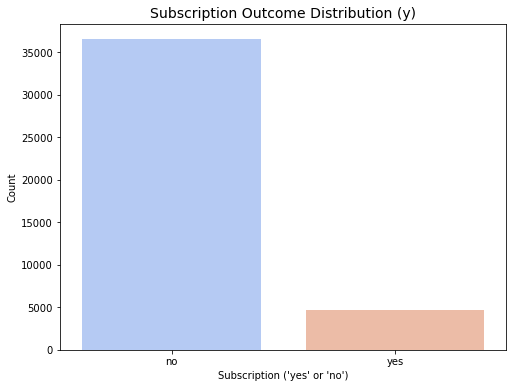

In [15]:
# 6 Visualizing target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='y', palette='coolwarm')
plt.title("Subscription Outcome Distribution (y)", fontsize=14)
plt.xlabel("Subscription ('yes' or 'no')")
plt.ylabel("Count")
plt.show()

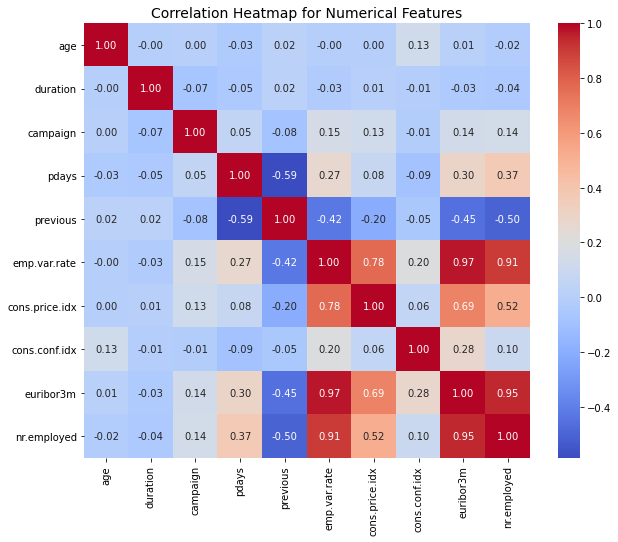

In [16]:
# 7 Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Numerical Features", fontsize=14)
plt.show()

Summary of Findings from EDA:
Data Integrity:

There are no missing values across all features in the dataset.
The target variable y (subscription) is imbalanced, with significantly more "no" than "yes" responses. Addressing this imbalance will be critical during model training.
Numerical Feature Correlations:

Features like euribor3m (3-month Euribor rate) and nr.employed (number of employees) exhibit strong correlations with other numerical variables, indicating potential predictive power.
Key Statistics:

Age ranges from 17 to 98, with a mean of ~40.
Features such as pdays and previous show many default values (e.g., 999 for pdays), likely needing special handling.
Next Steps:
Data Preprocessing:

Handle imbalanced classes using oversampling (e.g., SMOTE) or class weighting.
Normalize numerical features for algorithms sensitive to feature scales.
Encode categorical variables using techniques like one-hot encoding or label encoding.
Feature Engineering:

Evaluate feature importance.
Consider interactions or derived metrics from existing features.
Predictive Modeling:

Train models like Logistic Regression, Random Forest, or Gradient Boosting.
Use cross-validation to assess model performance using metrics such as F1 score due to the class imbalance.

In [17]:
# Data Preprocessing
# Encoding categorical variables
#categorical_cols = data.select_dtypes(include=['object']).columns
#label_encoders = {col: LabelEncoder() for col in categorical_cols if col != 'y'}
#for col, encoder in label_encoders.items():
#    data[col] = encoder.fit_transform(data[col])

# Encoding target variable 'y'
#data['y'] = LabelEncoder().fit_transform(data['y'])

# Handling imbalanced classes using SMOTE
#X = data.drop('y', axis=1)
#y = data['y']

In [18]:
# Splitting the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to balance the training set
#smote = SMOTE(random_state=42)
#X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scaling numerical features
#scaler = StandardScaler()
#numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
#X_train_balanced[numerical_cols] = scaler.fit_transform(X_train_balanced[numerical_cols])
#X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Checking shapes of the balanced dataset
#X_train_balanced.shape, y_train_balanced.shape, X_test.shape, y_test.shape

((58476, 20), (58476,), (8238, 20), (8238,))

In [25]:
# Load the dataset
#data = pd.read_excel('C:/Users/AMPOFO/OneDrive/Desktop/data/bank-additional-full.xlsx')  # Adjust path if needed

In [45]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [27]:
# Encode categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [28]:
# Split the data into features and target
X = data.drop('y', axis=1)  # Assuming 'y' is the target column
y = data['y']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [29]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)


In [30]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train_balanced)

LogisticRegression(random_state=42)

In [31]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [32]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8685360524399126

Confusion Matrix:
 [[6409  901]
 [ 182  746]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      7310
           1       0.45      0.80      0.58       928

    accuracy                           0.87      8238
   macro avg       0.71      0.84      0.75      8238
weighted avg       0.91      0.87      0.88      8238



Insights and Next Steps:

Feature Importance: Logistic regression provides coefficients that indicate feature importance. Features with higher absolute coefficients contribute more to the prediction.

Evaluation Metrics: The classification report provides accuracy, precision, recall, and F1 scores.